**Dataset:** 
https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020?resource=download

**Project Name:**
Stock Price Prediction

**Reference Link**
https://www.projectpro.io/article/machine-learning-regression-projects-ideas/501

## Importing Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Reading Dataset

In [30]:
data = pd.read_csv("TSLA.csv")

In [31]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Preliminary Checks

In [6]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2411,False,False,False,False,False,False,False
2412,False,False,False,False,False,False,False
2413,False,False,False,False,False,False,False
2414,False,False,False,False,False,False,False


In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Length: 2416, dtype: bool

<AxesSubplot:>

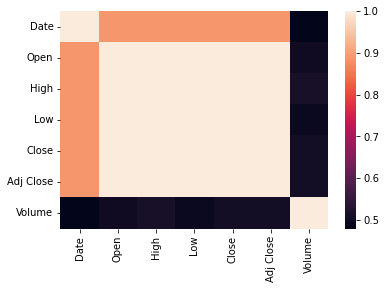

In [25]:
sns.heatmap(data.corr())

In [32]:
data.duplicated().sum()

0

In [33]:
#Coverting Date coloumn into float datatype
data['Date'] = data['Date'].str.replace('-', '')
data['Date'] = data['Date'].astype(float)

## Splitting Dataset into Train and Test Sets

In [34]:
X = data[['Date','Open','High','Low','Close','Adj Close']] #dividing the dataset into smaller features and target
y = data[['Volume']]


# x = data.iloc[:, :-1].values ---> take every row(first colon) except the last coloumn (second part) 
# y = data.iloc[:,: 4].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
X_train.shape

(1812, 6)

In [37]:
y_train.shape

(1812, 1)

## Implementing Multiple Linear Regression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [43]:
#Calculating coefficients 
print(model.coef_)

[[ 3.21362579e+01  5.96664756e+04  6.30452895e+05 -6.53153113e+05
  -2.22865286e+04 -2.22865286e+04]]


In [44]:
#Calculating intercept
print(model.intercept_)

[-6.44795589e+08]


## Evaluating the Regression Model 

In [45]:
from sklearn.metrics import r2_score

In [46]:
print(r2_score(y_test,y_pred))

0.6243385625709915


## Plotting Results

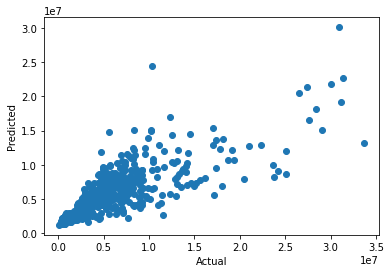

In [47]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

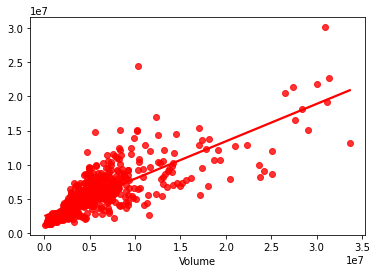

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');